In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.
Hint:
 import numpy as np
 import matplotlib.pyplot as plt
 from mpl_toolkits.mplot3d import Axes3D
 from sklearn import decomposition
 from sklearn import datasets

In [64]:
iris = sns.load_dataset('iris')
print(iris)
iris2= iris.groupby('species').sum()
print(iris2)
iris.keys()

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa            

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [66]:
iris1 = datasets.load_iris()
print(iris1['DESCR'])
print(iris1.keys())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
Y=iris1.target

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(Y)
print(list(iris1.target_names))
iris.columns

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa', 'versicolor', 'virginica']


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [73]:
iris['species'].value_counts()
df=pd.DataFrame(iris1['data'],columns=iris1['feature_names'])
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
print(scaled_data.shape)

(150, 4)


(150, 3)


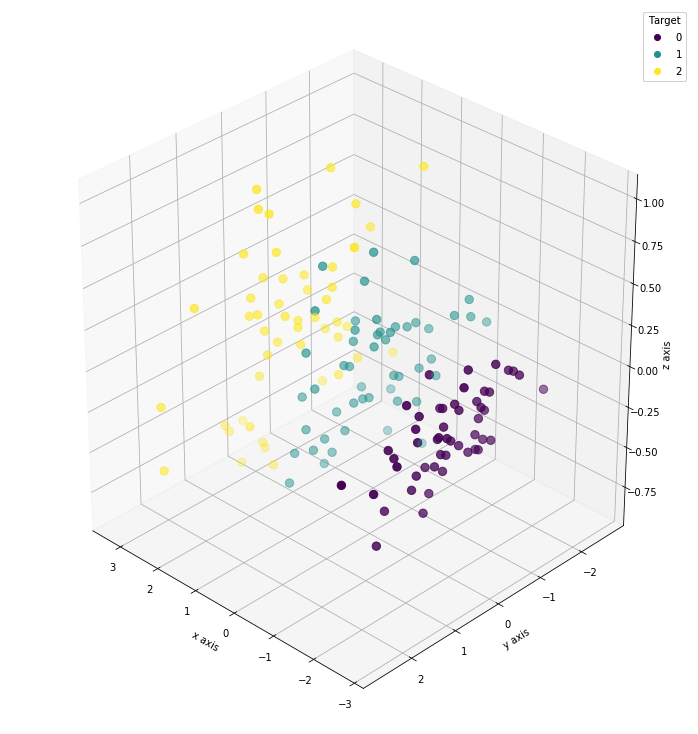

In [118]:
fig = plt.figure(1,figsize=(10,10))
plt.clf() 
ax = Axes3D(fig, rect=[0, 0, .95, 1], azim=134)
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(scaled_data)
x= pca.transform(scaled_data)
print(x.shape)
scatter=ax.scatter(x[:,0],x[:,1],x[:,2],c=Y,s=70)
    
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Target")
ax.add_artist(legend1)

Text(0.5, 0, "'setosa', '     versicolor', '    virginica'")

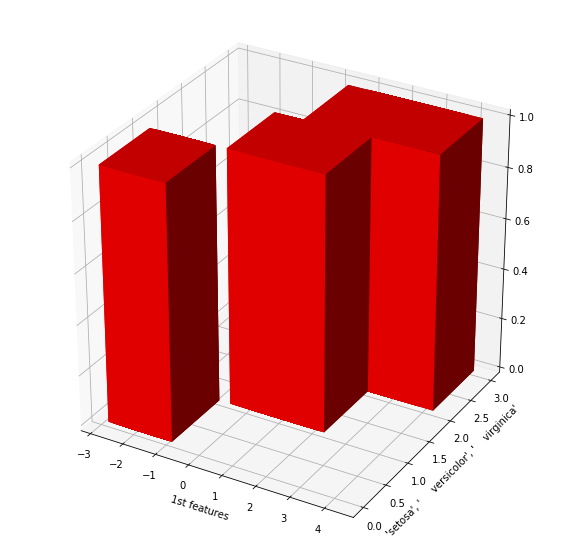

In [110]:
fig = plt.figure(figsize=(10,10))
ax1=fig.gca(projection='3d')
dy=np.ones(150)
dx=np.ones(150)
z=np.zeros(150)
ax1.bar3d(x[:,0],Y,z,dx,dy,dy,color='r')
ax1.set_xlabel('1st features')
ax1.set_ylabel("'setosa', '     versicolor', '    virginica'")

Text(0.5, 0, "'setosa   '  , 'versicolor'  , 'virginica'")

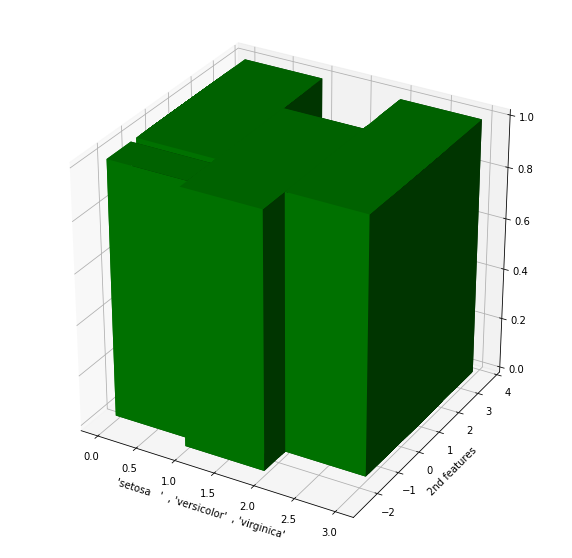

In [107]:
fig = plt.figure(figsize=(10,10))
ax1=fig.gca(projection='3d')
dy=np.ones(150)
dx=np.ones(150)
z=np.zeros(150)
ax1.bar3d(Y,x[:,1],z,dx,dy,dy,color='g')
ax1.set_ylabel('2nd features')
ax1.set_xlabel("'setosa   '  , 'versicolor'  , 'virginica'")

Text(0.5, 0, "'setosa', 'versicolor', 'virginica'")

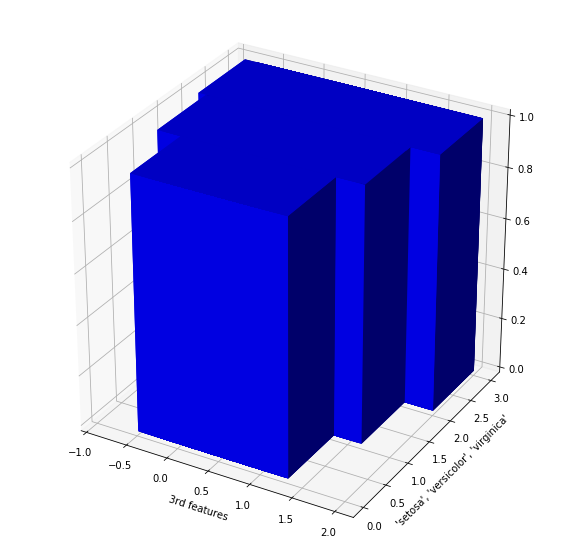

In [104]:
fig = plt.figure(figsize=(10,10))
ax1=fig.gca(projection='3d')
dy=np.ones(150)
dx=np.ones(150)
z=np.zeros(150)
ax1.bar3d(x[:,2],Y,z,dx,dy,dy,color='b')
ax1.set_xlabel('3rd features ')
ax1.set_ylabel("'setosa', 'versicolor', 'virginica'")

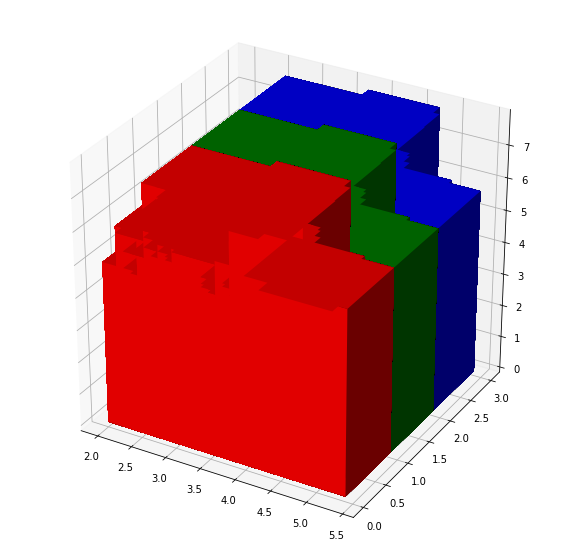

In [74]:
fig = plt.figure(figsize=(10,10))
ax1= fig.gca(projection='3d')
colors = ['r', 'g', 'b', 'y', 'm']
dy=np.ones(150)
dx=np.ones(150)
z=np.zeros(150)
for k in Y:
    if (k==0):
        ax1.bar3d(iris['sepal_width'],k,z,dx,dy,iris['sepal_length'],color='r')
    elif(k==1):
        ax1.bar3d(iris['sepal_width'],k,z,dx,dy,iris['sepal_length'],color='g')
    elif(k==2):
        ax1.bar3d(iris['sepal_width'],k,z,dx,dy,iris['sepal_length'],color='b')
plt.show()

In [14]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [97]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [116]:
pca = decomposition.PCA(n_components=2)
pca.fit(scaled_data)
y= pca.transform(scaled_data)

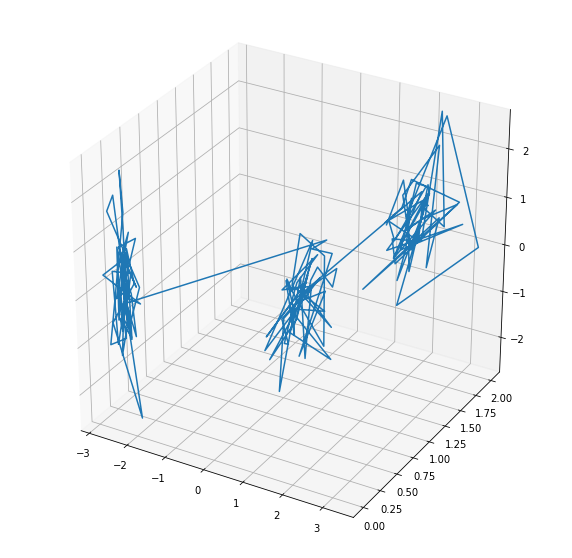

In [117]:
fig=plt.figure(figsize=(10,10))
ax1=fig.gca(projection='3d')
ax1.plot3D(y[:,0],Y,y[:,1])